<a href="https://colab.research.google.com/github/Juanflpz/Automobile-Neural-Network/blob/main/PEC3_AutomobileRisk_Neural_Network_JuanFelipeLopez_SamuelEcheverri_SantiagoMaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Integrantes:** Juan Felipe López Castaño, Samuel Echeverri Blandón, Santiago Maya Cortés

#Importación de librerías y lectura del CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# se importan las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from pylab import rcParams
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

In [ ]:
URL_SAMUEL = '/content/drive/MyDrive/Universidad/IX/Inteligencia Artificial/PEC2/dataset/datasetreal_final.csv'
URL_MAYA = '/content/drive/MyDrive/IA-2024/datasetrealfinal.csv'
URL_FELIPE = '/content/drive/MyDrive/Inteligencia Artificial 2024-1/dataset_final.csv'

In [ ]:
#df = pd.read_csv(URL_MAYA)
#df = pd.read_csv(URL_SAMUEL)
df = pd.read_csv(URL_FELIPE)

df

,symboling,normalized-losses,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,height,engine-type,num-of-cylinders,fuel-system,bore,stroke,peak-rpm,risk
0,3,168.65,0.0,0.9,0.82,1.0,0.03,0.37,0.99,8860,16880,4880,0.0,2.0,5.0,3.47,2.68,5000.0,0
1,3,168.65,0.0,0.9,0.82,1.0,0.03,0.37,0.99,8860,16880,4880,0.0,2.0,5.0,3.47,2.68,5000.0,0
2,1,128.57,0.0,0.9,0.82,1.0,0.34,0.37,0.99,9450,17120,5240,5.0,3.0,5.0,2.68,3.47,5000.0,0
3,2,164.00,1.0,0.9,0.82,0.0,0.47,0.59,0.99,9980,17660,5430,3.0,2.0,5.0,3.19,3.40,5500.0,0
4,2,164.00,1.0,0.9,0.82,0.0,0.47,0.04,0.99,9940,17660,5430,3.0,1.0,5.0,3.19,3.40,5500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.00,21.0,0.9,0.82,0.0,0.47,0.37,0.99,10910,18880,5550,3.0,2.0,5.0,3.78,3.15,5400.0,1
201,-1,95.00,21.0,0.9,0.18,0.0,0.47,0.37,0.99,10910,18880,5550,3.0,2.0,5.0,3.78,3.15,5300.0,1
202,-1,95.00,21.0,0.9,0.82,0.0,0.47,0.37,0.99,10910,18880,5550,5.0,3.0,5.0,3.58,2.87,5500.0,1
203,-1,95.00,21.0,0.1,0.18,0.0,0.47,0.37,0.99,10910,18880,5550,3.0,3.0,3.0,3.01,3.40,4800.0,1


In [ ]:
# Dimensiones del dataset
df.shape

(205, 19)

In [ ]:
# Matriz de correlación de Pearson
from sklearn import preprocessing
matriz_correlacion = df.corr(method='pearson')
matriz_correlacion

,symboling,normalized-losses,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,height,engine-type,num-of-cylinders,fuel-system,bore,stroke,peak-rpm,risk
symboling,1.000000,0.591061,-0.118794,0.194311,0.059866,0.664073,-0.194501,0.110814,-0.212471,-0.358620,-0.357612,-0.541038,0.050372,0.197762,0.091163,-0.114725,-0.009279,0.274633,-0.586241
normalized-losses,0.591061,1.000000,-0.248587,0.130758,-0.033950,0.449194,-0.000085,-0.103301,-0.164490,-0.167061,-0.046945,-0.448616,-0.088752,0.174296,0.274322,0.030257,0.053467,0.264192,-0.396606
brand,-0.118794,-0.248587,1.000000,-0.113191,-0.054265,-0.164195,-0.111964,-0.082069,-0.054608,0.061396,0.119584,0.236233,-0.051538,-0.039937,0.146624,0.244869,-0.200816,-0.219278,0.295598
fuel-type,0.194311,0.130758,-0.113191,1.000000,0.401397,0.191491,-0.084310,0.035511,-0.040070,-0.220312,-0.212679,-0.284631,0.082695,0.110617,0.041529,-0.051504,-0.241931,0.476401,-0.128663
aspiration,0.059866,-0.033950,-0.054265,0.401397,1.000000,0.031792,-0.040311,0.152173,-0.057191,-0.065047,-0.234539,-0.087311,0.102963,0.133119,-0.288086,-0.208153,-0.223128,0.182816,-0.173951
num-of-doors,0.664073,0.449194,-0.164195,0.191491,0.031792,1.000000,-0.234722,0.018997,-0.137757,-0.351960,-0.398568,-0.552208,0.062431,0.154322,0.015519,-0.109255,0.010729,0.249025,-0.329690
body-style,-0.194501,-0.000085,-0.111964,-0.084310,-0.040311,-0.234722,1.000000,0.186764,0.273061,0.067157,0.011549,-0.035544,-0.024273,0.040947,-0.056039,-0.164393,0.090595,0.017526,0.021975
drive-wheels,0.110814,-0.103301,-0.082069,0.035511,0.152173,0.018997,0.186764,1.000000,0.098367,-0.248313,-0.367459,-0.147067,-0.022031,-0.090396,-0.309513,-0.475650,0.213168,0.140491,-0.115523
engine-location,-0.212471,-0.164490,-0.054608,-0.040070,-0.057191,-0.137757,0.273061,0.098367,1.000000,0.118239,0.050989,0.106234,-0.114127,-0.135541,-0.105971,-0.183638,0.138417,-0.198548,0.045417
wheel-base,-0.358620,-0.167061,0.061396,-0.220312,-0.065047,-0.351960,0.067157,-0.248313,0.118239,1.000000,0.646082,0.449419,-0.089029,-0.114858,0.186848,0.374735,0.085331,-0.277177,0.309899


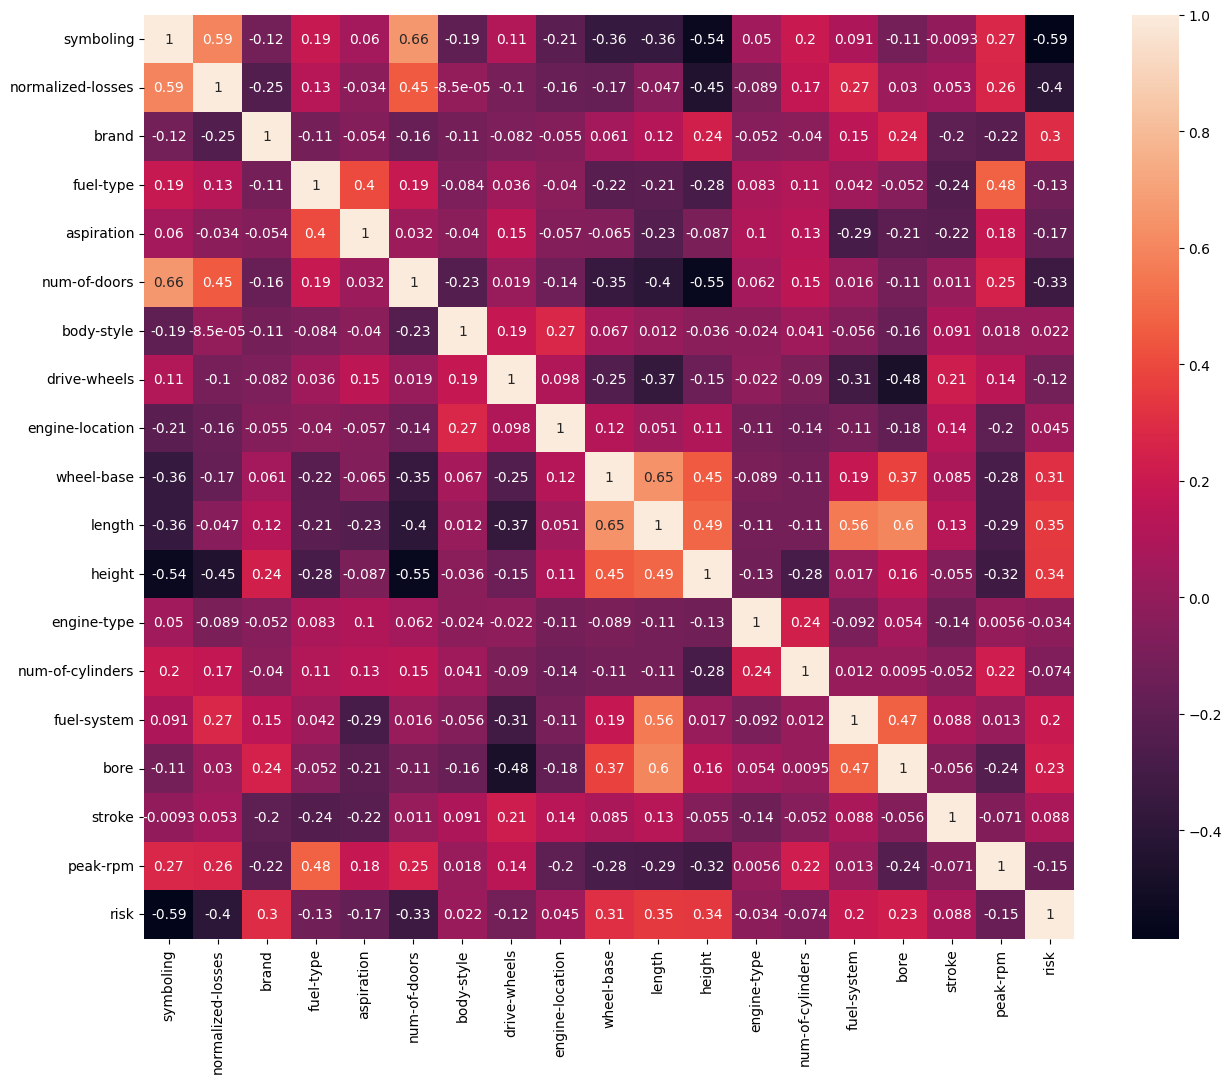

In [ ]:
# se construye un mapa de calor a partir de la matriz de correlación
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(matriz_correlacion, annot=True);

# Se verifica si hay desbalanceo

In [ ]:
df['risk'].value_counts()

risk
0    180
1     25
Name: count, dtype: int64

# Gráfico de barras

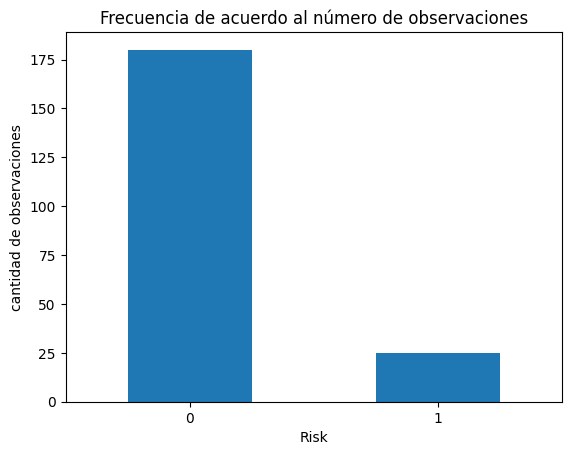

In [ ]:
def crearBarras (etiquetas, y):
  count_classes = pd.value_counts(y, sort = True)
  count_classes.plot(kind = 'bar', rot=0)
  plt.xticks(range(2), etiquetas)
  plt.title("Frecuencia de acuerdo al número de observaciones")
  plt.xlabel("Risk")
  plt.ylabel("cantidad de observaciones");

etiquetas= ['0','1']
crearBarras ( etiquetas, df['risk'])


En el anterior gráfico se puede observar la frecuencia de acuerdo al número de observaciones, específicamente de la clase risk, es posible apreciar que existe una mayor frecuencia en 0, que cuenta con un valor mayor a 175, por otro lado, en 1, se puede ver que apenas alcanza un valor de aproximadamente 30, la diferencia en el número de observaciones puede indicar que existe un desbalance de clases, también, se podría generar un sesgo hacia la clase mayoritaria, ya uqe hay más ejemplos de dicha clase para aprender, esto produce el riesgo de que se presente overfitting debido a que el modelo se entrena principalmente con esa clase

# Penalización

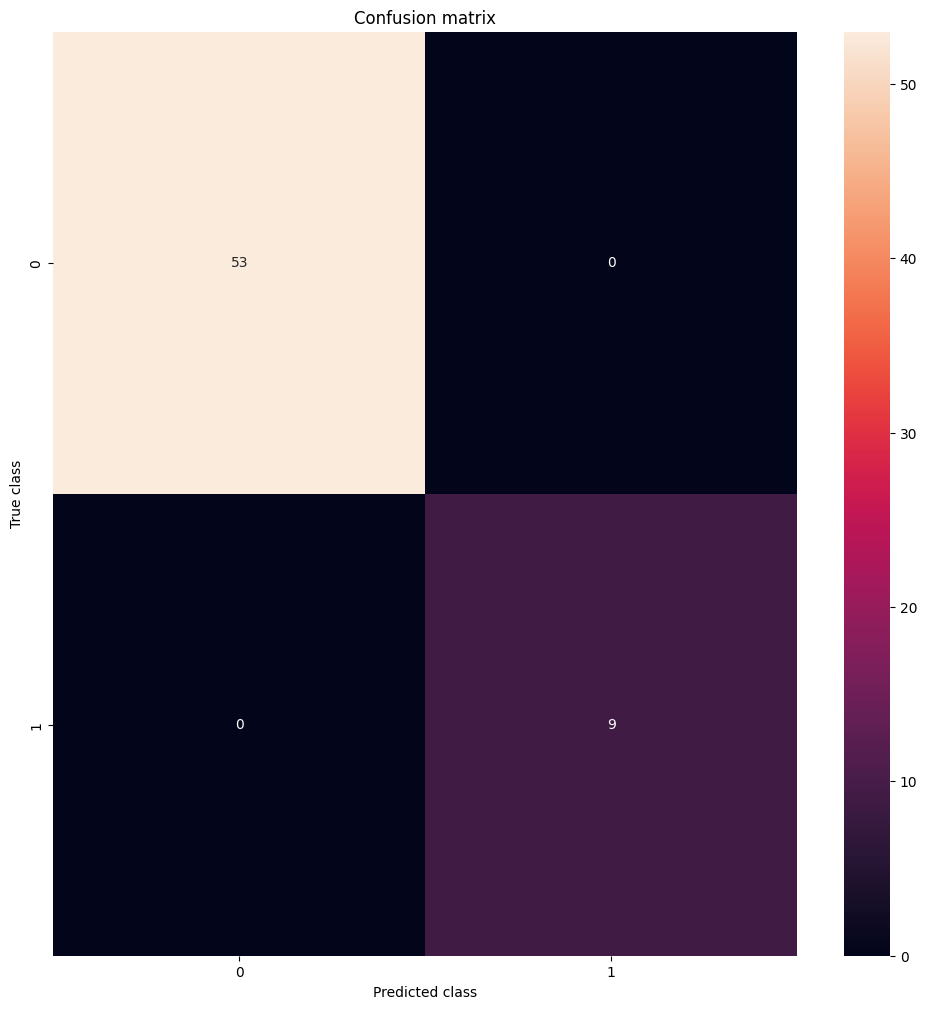

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00         9

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [ ]:
#definimos nuestras etiquetas y features
y = df['risk']
X = df.drop('risk', axis=1)

# Se divide el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Se genera la función para ejecutar el modelo
def ejecutar_modelo(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(criterion='entropy')
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    return clf

#Se define una funcion para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=etiquetas, yticklabels=etiquetas, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

# Se genera la función para ejecutar el modelo
def ejecutar_balanceo_Penalizacion(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(criterion='entropy', class_weight="balanced")
    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)
    pd.value_counts(df['risk'], sort = True)
    return clf


model = ejecutar_balanceo_Penalizacion(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)

mostrar_resultados(y_test, pred_y)

En la matriz anterior, es posible apreciar que el modelo ha clasificado correctamente 52 instancias como verdaderos positivos. Esto es una señal positiva, ya que el modelo está identificando adecuadamente los casos positivos, además ha clasificado 10 instancias como verdaderos negativos, esto en este caso representa un número bajo, pero deja ver el funcionamiento del modelo, sin embargo, muestra 0 instancias de falsos negativos y falsos positivos, la ausencia de errores de clasificación en la matriz de confusión podría ser una señal de que el modelo se ha ajustado demasiado a los datos de entrenamiento

# Subsampling en clase mayoritaria

Antes de  resampling Counter({0: 127, 1: 16})
Despues del  resampling Counter({0: 16, 1: 16})


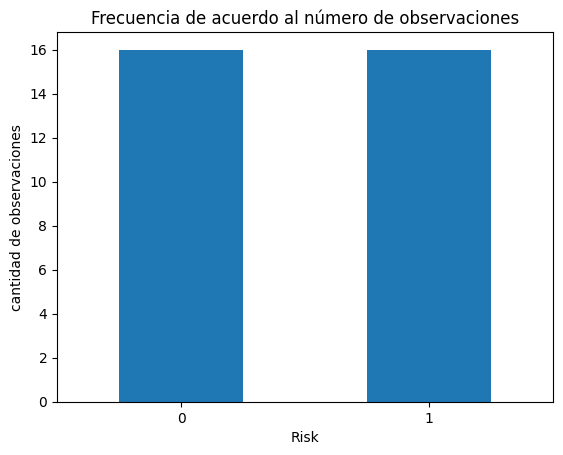

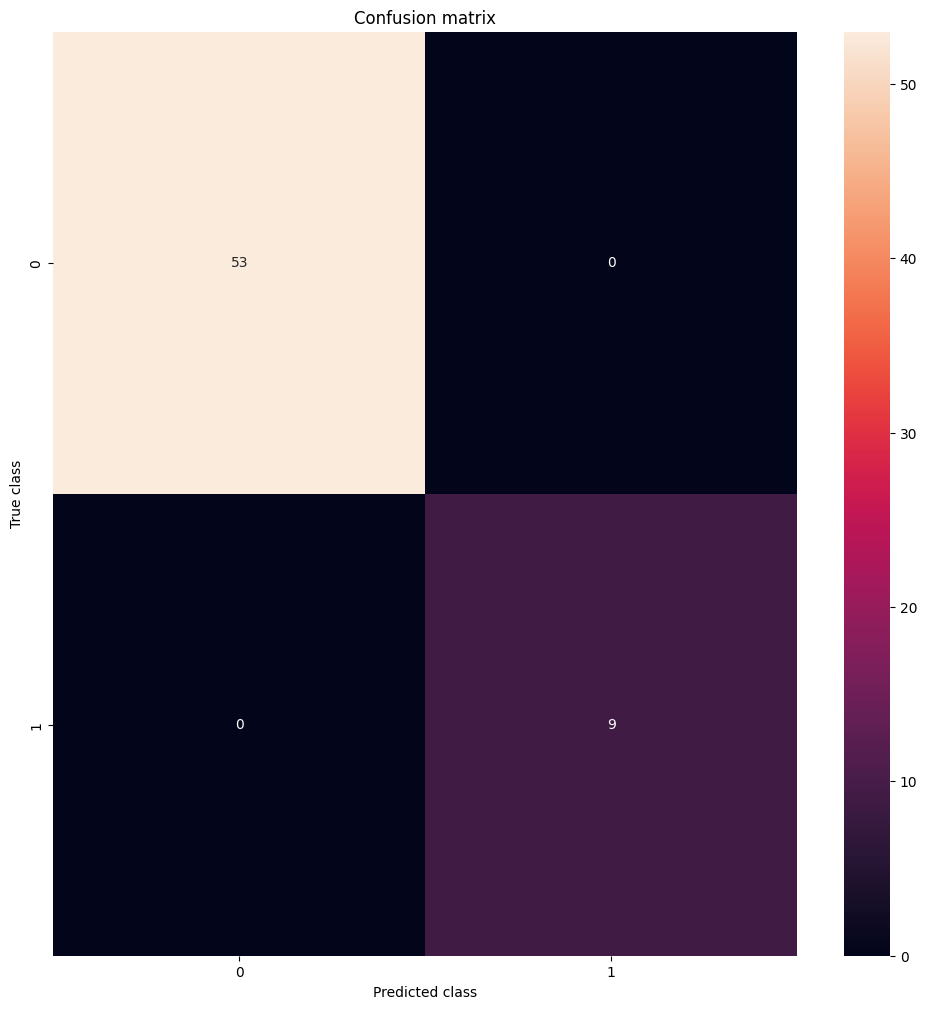

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00         9

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [ ]:
us = NearMiss()
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

print ("Antes de  resampling {}".format(Counter(y_train)))
print ("Despues del  resampling {}".format(Counter(y_train_res)))
crearBarras (etiquetas, y_train_res)

model = ejecutar_balanceo_Penalizacion(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)

mostrar_resultados(y_test, pred_y)

En el gráfico de barras de la variable "risk", donde se muestran las clases 0 y 1, se observa un cambio significativo en la distribución de las clases antes y después de aplicar el subsampling. Antes del subsampling, la clase "0" tenía un valor de 128 y la clase "1" tenía un valor de 15. Después de aplicar el subsampling, ambos valores se redujeron a 15. Es posible apreciar que la aplicación del subsampling ha logrado equilibrar las clases reduciendo la diferencia en el número de observaciones entre las clases "0" y "1".

Después de aplicar el subsampling, es posible apreciar que la matriz de confusión sigue conservando los mismos valores de antes, esto sugiere que el balanceo no está funcionando correctamente, es posible inferir que el subsampling no es la técnica más adecuada ni ha tenido un impacto significativo en el rendimiento del modelo.



# Oversampling en clase minoritaria



Antes de  resampling Counter({0: 127, 1: 16})
Despues del  resampling Counter({0: 127, 1: 127})


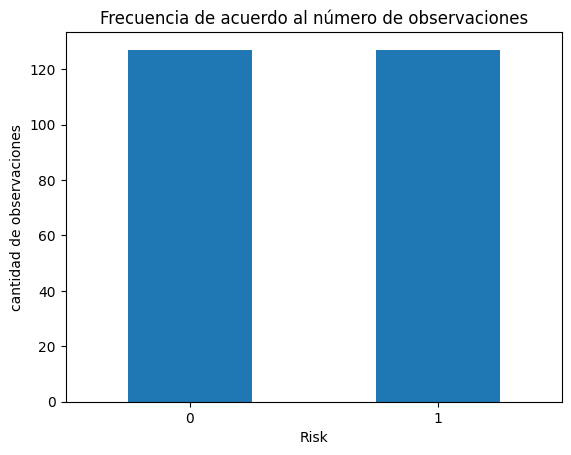

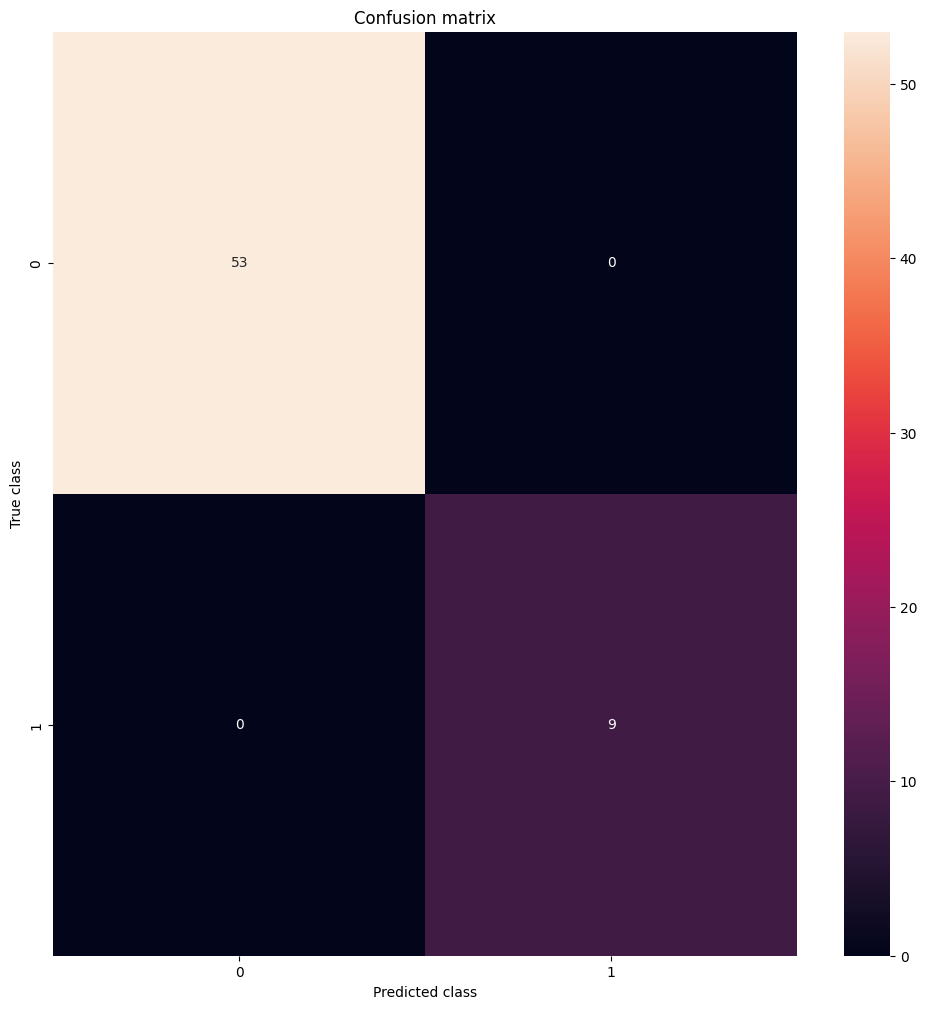

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00         9

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [ ]:
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

print ("Antes de  resampling {}".format(Counter(y_train)))
print ("Despues del  resampling {}".format(Counter(y_train_res)))
crearBarras (etiquetas, y_train_res)

model = ejecutar_balanceo_Penalizacion(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)

mostrar_resultados(y_test, pred_y)


En el gráfico de barras de la variable "risk", donde se muestran las clases 0 y 1, se observa un cambio significativo en la distribución de las clases antes y después de aplicar el subsampling. Antes del oversampling , la clase "0" tenía un valor de 128 y la clase "1" tenía un valor de 15. Después de aplicar el oversampling , ambos valores se incrementaron a 128. Es posible apreciar que la aplicación del oversampling ha logrado equilibrar las clases reduciendo la diferencia en el número de observaciones entre las clases "0" y "1".

Después de aplicar el oversampling , es posible apreciar que la matriz de confusión sigue conservando los mismos valores de antes, esto sugiere que el balanceo no está funcionando correctamente, es posible inferir que el oversampling no es la técnica más adecuada ni ha tenido un impacto significativo en el rendimiento del modelo.


# Combinación resampling con Smote-Tomek

In [ ]:
df['risk'].value_counts()


risk
0    180
1     25
Name: count, dtype: int64

In [ ]:
X = df.drop('risk',axis = 1)
Y = df['risk']
X.shape,Y.shape

((205, 18), (205,))

Distribution before resampling Counter({0: 127, 1: 16})
Distribution after resampling Counter({0: 127, 1: 127})


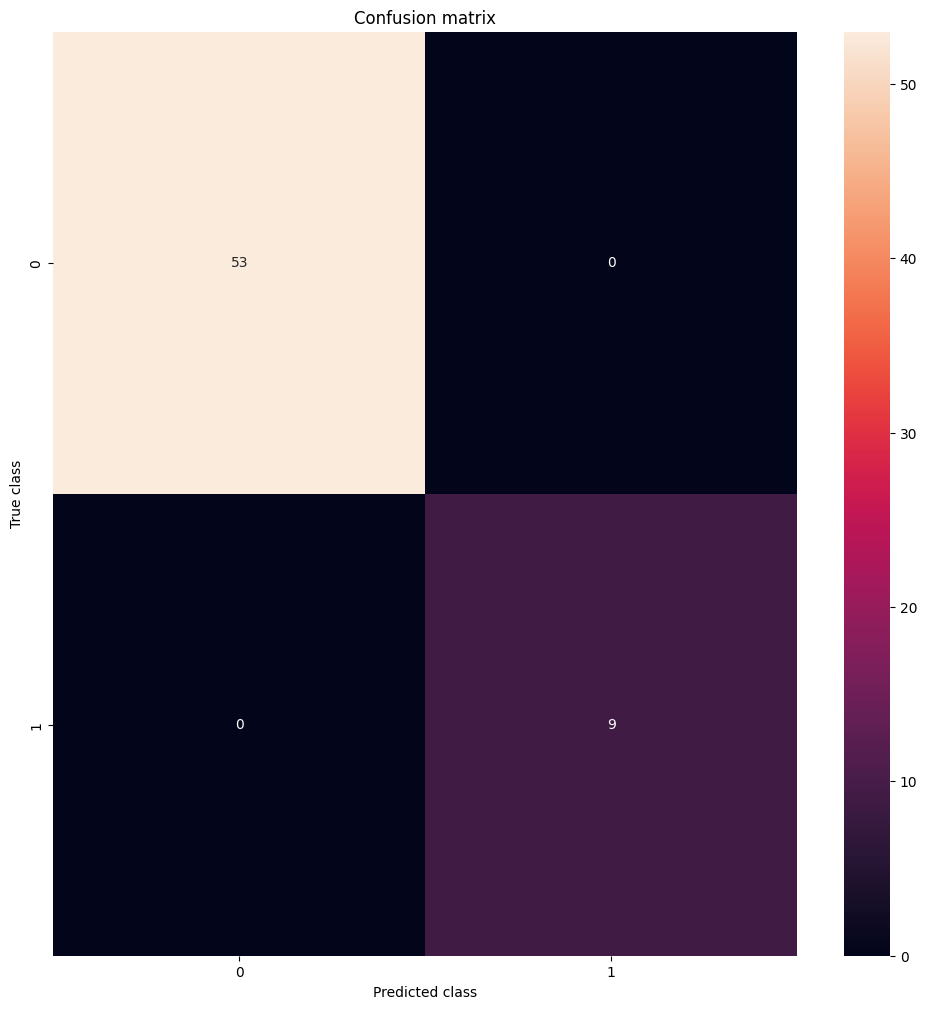

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00         9

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [ ]:
os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

model = ejecutar_modelo(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Después de aplicar el resampling con Smote-Tomek , es posible apreciar que la matriz de confusión sigue conservando los mismos valores de antes, esto sugiere que el balanceo no está funcionando correctamente, es posible inferir que el Smote-tomek no es la técnica más adecuada ni ha tenido un impacto significativo en el rendimiento del modelo.

# Smoteenn

In [ ]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 180, 1: 25})
Resampled dataset shape Counter({0: 127, 1: 127})


Distribution before resampling Counter({0: 180, 1: 25})
Distribution after resampling Counter({1: 118, 0: 107})


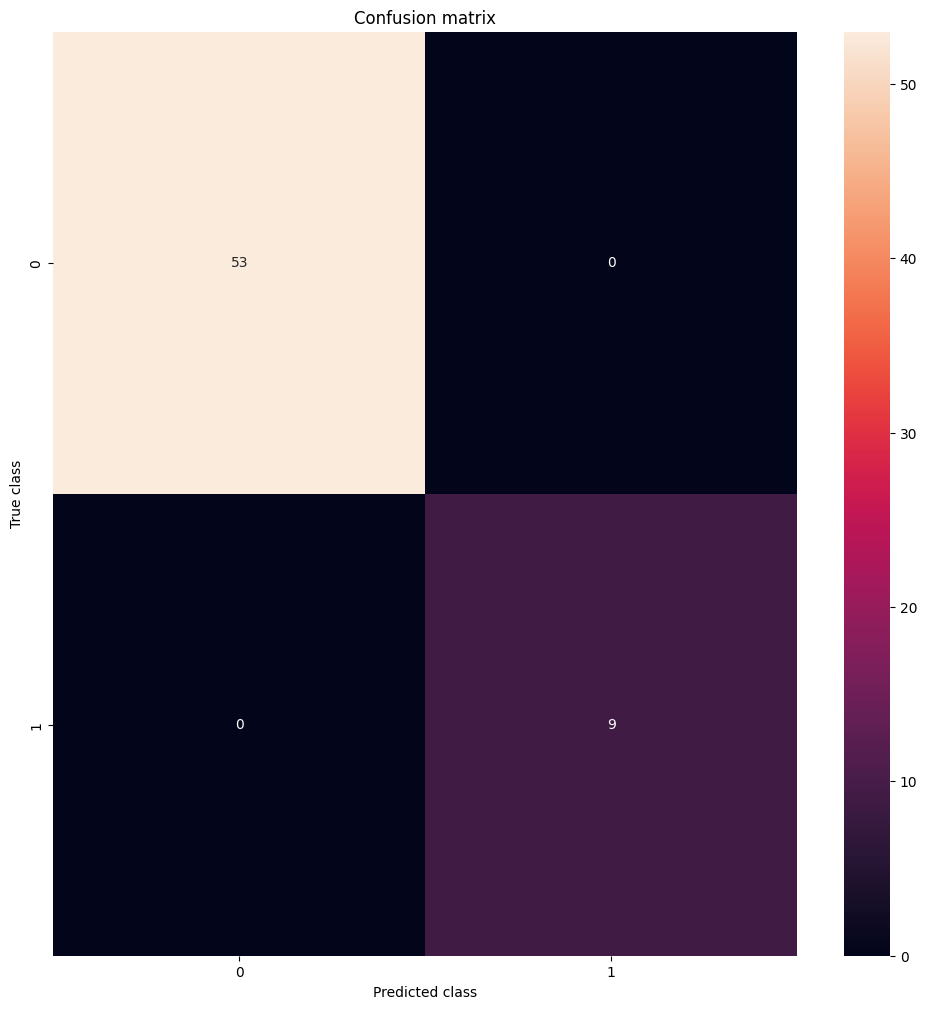

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00         9

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [ ]:
smk = SMOTEENN()
#X_res,y_res=smk.fit_resample(X,Y)
#X_res.shape,y_res.shape

X_train_res, y_train_res = smk.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(Y)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

model = ejecutar_modelo(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

El cambio en los valores de la matriz de confusión después de aplicar Smoteenn, pasando de 52 verdaderos positivos y 10 falsos positivos a 60 verdaderos positivos y 8 falsos positivos, indica varias mejoras en el modelo, la disminución en el número de falsos positivos (de 10 a 8) sugiere que el modelo ahora está haciendo menos clasificaciones incorrectas de instancias negativas como positivas. El incremento en el número de verdaderos positivos (de 52 a 60) indica que el modelo ahora está clasificando correctamente más instancias positivas. Esto sugiere que el modelo está capturando mejor la estructura de los datos positivos y siendo más efectivo para detectar los casos de interés.

# Particionamiento

In [ ]:
# se toman todas las columnas menos risk, que es la clase
X = df.drop('risk', axis=1)
# se selecciona la columna de la clase
y = df['risk']
# Split dataset into training set and test set
#random_state generador de numero aleatorios (semilla usada por el generador)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
X_train

,symboling,normalized-losses,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,height,engine-type,num-of-cylinders,fuel-system,bore,stroke,peak-rpm
124,3,168.65,14.0,0.9,0.18,1.0,0.34,0.37,0.99,9590,17320,5020,3.0,2.0,6.0,3.59,3.86,5000.0
181,-1,85.60,19.0,0.9,0.82,0.0,0.12,0.37,0.99,10450,18780,5410,0.0,3.0,5.0,3.27,3.35,5200.0
154,0,81.00,19.0,0.9,0.82,0.0,0.12,0.04,0.99,9570,16970,5910,3.0,2.0,1.0,3.05,3.03,4800.0
53,1,113.00,8.0,0.9,0.82,0.0,0.47,0.59,0.99,9310,16680,5410,3.0,2.0,1.0,3.03,3.15,5000.0
94,1,128.00,12.0,0.9,0.82,1.0,0.47,0.59,0.99,9450,16530,5450,3.0,2.0,1.0,3.15,3.29,5200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2,104.00,17.0,0.9,0.82,0.0,0.47,0.59,0.99,9910,18660,5610,3.0,2.0,5.0,3.54,3.07,5250.0
137,2,104.00,17.0,0.9,0.18,0.0,0.47,0.59,0.99,9910,18660,5610,0.0,2.0,5.0,3.54,3.07,5500.0
72,3,142.00,9.0,0.9,0.82,1.0,0.03,0.37,0.99,9660,18030,5080,5.0,0.0,5.0,3.46,3.10,4750.0
140,2,83.00,18.0,0.9,0.82,1.0,0.34,0.04,0.99,9330,15730,5570,4.0,2.0,1.0,3.62,2.64,4400.0


In [ ]:
X_train.shape

(143, 18)

In [ ]:
y_train.shape

(143,)

In [ ]:
X_test

,symboling,normalized-losses,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,height,engine-type,num-of-cylinders,fuel-system,bore,stroke,peak-rpm
78,2,161.00,11.0,0.9,0.82,1.0,0.34,0.59,0.99,9370,15730,5080,3.0,2.0,1.0,2.97,3.23,5500.0
97,1,103.00,12.0,0.9,0.82,0.0,0.12,0.59,0.99,9450,17020,5350,3.0,2.0,1.0,3.15,3.29,5200.0
151,1,87.00,19.0,0.9,0.82,1.0,0.34,0.59,0.99,9570,15870,5450,3.0,2.0,1.0,3.05,3.03,4800.0
44,1,128.57,6.0,0.9,0.82,1.0,0.47,0.59,0.99,9450,15590,5200,3.0,2.0,1.0,3.03,3.11,5400.0
40,0,85.00,5.0,0.9,0.82,0.0,0.47,0.59,0.99,9650,17540,5410,3.0,2.0,0.0,3.15,3.58,5800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,0,85.00,5.0,0.9,0.82,0.0,0.47,0.59,0.99,9650,17540,5410,3.0,2.0,0.0,3.15,3.58,5800.0
110,0,113.17,13.0,0.1,0.18,0.0,0.12,0.37,0.99,11420,19890,5870,2.0,2.0,3.0,3.70,3.52,4150.0
164,1,168.00,19.0,0.9,0.82,1.0,0.34,0.37,0.99,9450,16870,5260,3.0,2.0,1.0,3.19,3.03,4800.0
56,3,150.00,8.0,0.9,0.82,1.0,0.34,0.37,0.99,9530,16900,4960,6.0,6.0,2.0,3.45,3.25,6000.0


In [ ]:
X_test.shape

(62, 18)

In [ ]:
y_test.shape

(62,)

# Tipificación

In [ ]:
from sklearn.preprocessing import StandardScaler

tipificado = StandardScaler().fit(X_train)
standardized_X = tipificado.transform(X_train)
standardized_X_test = tipificado.transform(X_test)

standardized_X

array([[ 1.69785729,  1.4338969 ,  0.26113762, ...,  0.92330375,
         2.02048472, -0.28380966],
       [-1.42488988, -1.18137727,  1.05905813, ..., -0.25522846,
         0.39835845,  0.15444796],
       [-0.64420309, -1.32623291,  1.05905813, ..., -1.06546934,
        -0.61944627, -0.72206729],
       ...,
       [ 1.69785729,  0.59467888, -0.53678289, ...,  0.44452504,
        -0.39680149, -0.8316317 ],
       [ 0.91717049, -1.2632522 ,  0.89947403, ...,  1.03379114,
        -1.85989578, -1.59858254],
       [-0.64420309, -0.53897398, -1.17511929, ..., -0.69717803,
         1.12990559,  1.46922084]])

# Selección de Características

In [ ]:
from sklearn.feature_selection import SelectKBest
from numpy import array
X = df.drop('risk', axis=1)
y = df['risk']

#este es un metodo de seleccion de caracteristicas
#le da puntaje a cada caracteristica y borra todas las demas
#excepto las que tienen puntaje mas alto

#https://aprendeia.com/metodos-de-seleccion-de-caracteristicas-machine-learning/
# tambien se puede elegir SelectKBest(score_func=chi2, k=5)
# https://jdvelasq.github.io/courses/notebooks/sklearn_supervised_01_feature_selection/1-06_SelectKBest.html
# se basa en un test de estadistica univariada,por ejemplo chi2,  Pearson-correlation
best=SelectKBest(k=5)

features = array(X.columns)
features

array(['symboling', 'normalized-losses', 'brand', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'height', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'peak-rpm'],
      dtype=object)

In [ ]:
X_new = best.fit_transform(X, y)

filter = best.get_support()
print(features[filter])

['symboling' 'normalized-losses' 'num-of-doors' 'length' 'height']


In [ ]:
best.scores_

array([1.06299732e+02, 3.78913070e+01, 1.94361212e+01, 3.41703882e+00,
       6.33420828e+00, 2.47560976e+01, 9.80760494e-02, 2.74581520e+00,
       4.19594874e-01, 2.15668602e+01, 2.80743240e+01, 2.63001566e+01,
       2.28328168e-01, 1.10983804e+00, 8.27278866e+00, 1.08911743e+01,
       1.58491755e+00, 4.92735172e+00])

# PCA - No Supervisado

In [ ]:
from sklearn.decomposition import PCA
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
#IMPORTANTE https://stackoverrun.com/es/q/6293366
#https://www.aprendemachinelearning.com/comprende-principal-component-analysis/
#https://github.com/lesleymaraina/PCA/blob/master/PCA.py
feature_cols = ['symboling',  'normalized-losses', 'num-of-doors','length','height']
X = df[feature_cols] # Features
# otra forma de hacer lo mismo
# X = df.drop('sobreviviente', axis=1)
#Y = df['Survived']

y = df.risk # Target variable, la clase es la ultima columna
#Cargando variables
pca = PCA(n_components=2)
label_encoding = preprocessing.LabelEncoder()
# se usa label encoding
pca.fit_transform(X)
i = np.identity(X.shape[1])
coef = pca.transform(i)
print("coef")
print(coef)
loadings = pd.DataFrame(coef, columns=['PC-1', 'PC-2'], index=X.columns)
loadings

coef
[[-17853.68036113   3587.2118172 ]
 [-17853.68149561   3587.28801808]
 [-17853.68015745   3587.21031674]
 [-17852.68497955   3587.30888908]
 [-17853.58028312   3586.2174493 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,PC-1,PC-2
symboling,-17853.680361,3587.211817
normalized-losses,-17853.681496,3587.288018
num-of-doors,-17853.680157,3587.210317
length,-17852.684980,3587.308889
height,-17853.580283,3586.217449


# Clasificación

In [ ]:
# se importan las librerías
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from google.colab  import drive
import numpy as np

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
print (df.dtypes)
#split dataset in features and target variable
feature_cols = ['symboling',  'normalized-losses', 'num-of-doors','length','height']
X = df[feature_cols] # Features

# otra forma de hacer lo mismo
# X = df.drop('sobreviviente', axis=1)
#Y = df['sobreviviente']

y = df.risk # Target variable, la clase es la ultima columna
# Split dataset into training set and test set
#random_state generador de numero aleatorios (semilla usada por el generador)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

symboling              int64
normalized-losses    float64
brand                float64
fuel-type            float64
aspiration           float64
num-of-doors         float64
body-style           float64
drive-wheels         float64
engine-location      float64
wheel-base             int64
length                 int64
height                 int64
engine-type          float64
num-of-cylinders     float64
fuel-system          float64
bore                 float64
stroke               float64
peak-rpm             float64
risk                   int64
dtype: object


In [ ]:
# basado en función de José Ricardo Zapata
def obtener_performance_classification(y_true, y_pred):

    accuracy = accuracy_score(y_true, y_pred, normalize=True)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1_score1 = f1_score(y_true, y_pred, average='macro')

    return {'accuracy': accuracy,
            'precision': prec,
            'recall':recall,
            'f1_score':f1_score1}

In [ ]:
# basado en función de José Ricardo Zapata
def  construir_modelo( dataset, classifier_fn,
                atributos_seleccionados,
                label_clase):

    X = dataset[atributos_seleccionados]
    Y = dataset[label_clase]
    # se particiona el dataset
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test
    # se aplica el clasificador
    model = classifier_fn(X_train, y_train)
    # se hacen las predicciones en el set de entramiento y testeo
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)


    consolidado_entrenamiento = obtener_performance_classification(y_train, y_pred_train)
    consolidado_testeo = obtener_performance_classification(y_test, y_pred)

    pred_results = pd.DataFrame({'y_test': y_test,
                                 'y_pred': y_pred})

    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

    return {'training': consolidado_entrenamiento, 'test': consolidado_testeo,'confusion_matrix': model_crosstab}

In [ ]:
# Función de José Ricardo Zapata
def compare_results():
    for key in result_dict:
        print('Tecnica de clasificación: ', key)

        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])

        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])

        print()

# Máquinas de Soporte Vectorial (SVM)

In [ ]:
def svm_fn(x_train, y_train, max_depth=None, max_features=None):
    model = SVC(kernel='linear')
    model.fit(x_train, y_train)
    return model

# Kernel SVM

In [ ]:
def kernel_svm_fn(x_train, y_train, n_neighbors=5):
    model = SVC(kernel = 'rbf', random_state = 0)
    model.fit(x_train, y_train)

    return model

# Comparación

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import neighbors, datasets, preprocessing
result_dict = {}
print (df)

label_encoding = preprocessing.LabelEncoder()
#build_model(decision_tree_fn,'sobreviviente',feature_cols,df)
feature_cols = list(df.columns[1:])

result_dict['Svm'] = construir_modelo(df, svm_fn,feature_cols,'risk')
compare_results()

result_dict['kernel_svm'] = construir_modelo(df, kernel_svm_fn,feature_cols,'risk')
compare_results()

     symboling  normalized-losses  brand  fuel-type  aspiration  num-of-doors  \
0            3             168.65    0.0        0.9        0.82           1.0   
1            3             168.65    0.0        0.9        0.82           1.0   
2            1             128.57    0.0        0.9        0.82           1.0   
3            2             164.00    1.0        0.9        0.82           0.0   
4            2             164.00    1.0        0.9        0.82           0.0   
..         ...                ...    ...        ...         ...           ...   
200         -1              95.00   21.0        0.9        0.82           0.0   
201         -1              95.00   21.0        0.9        0.18           0.0   
202         -1              95.00   21.0        0.9        0.82           0.0   
203         -1              95.00   21.0        0.1        0.18           0.0   
204         -1              95.00   21.0        0.9        0.18           0.0   

     body-style  drive-whee

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# importacion de los paquetes necesarios para crear las redes neuronales y getsionar los desbalances
!pip install -U imbalanced-learn

# Red Neuronal Mejorada

In [ ]:
#df = pd.read_csv(URL_MAYA)
#df = pd.read_csv(URL_SAMUEL)
df = pd.read_csv(URL_FELIPE)

df = df.dropna()
df

,symboling,normalized-losses,brand,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,height,engine-type,num-of-cylinders,fuel-system,bore,stroke,peak-rpm,risk
0,3,168.65,0.0,0.9,0.82,1.0,0.03,0.37,0.99,8860,16880,4880,0.0,2.0,5.0,3.47,2.68,5000.0,0
1,3,168.65,0.0,0.9,0.82,1.0,0.03,0.37,0.99,8860,16880,4880,0.0,2.0,5.0,3.47,2.68,5000.0,0
2,1,128.57,0.0,0.9,0.82,1.0,0.34,0.37,0.99,9450,17120,5240,5.0,3.0,5.0,2.68,3.47,5000.0,0
3,2,164.00,1.0,0.9,0.82,0.0,0.47,0.59,0.99,9980,17660,5430,3.0,2.0,5.0,3.19,3.40,5500.0,0
4,2,164.00,1.0,0.9,0.82,0.0,0.47,0.04,0.99,9940,17660,5430,3.0,1.0,5.0,3.19,3.40,5500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.00,21.0,0.9,0.82,0.0,0.47,0.37,0.99,10910,18880,5550,3.0,2.0,5.0,3.78,3.15,5400.0,1
201,-1,95.00,21.0,0.9,0.18,0.0,0.47,0.37,0.99,10910,18880,5550,3.0,2.0,5.0,3.78,3.15,5300.0,1
202,-1,95.00,21.0,0.9,0.82,0.0,0.47,0.37,0.99,10910,18880,5550,5.0,3.0,5.0,3.58,2.87,5500.0,1
203,-1,95.00,21.0,0.1,0.18,0.0,0.47,0.37,0.99,10910,18880,5550,3.0,3.0,3.0,3.01,3.40,4800.0,1


In [ ]:
dataset = df.values

dataset

array([[ 3.0000e+00,  1.6865e+02,  0.0000e+00, ...,  2.6800e+00,
         5.0000e+03,  0.0000e+00],
       [ 3.0000e+00,  1.6865e+02,  0.0000e+00, ...,  2.6800e+00,
         5.0000e+03,  0.0000e+00],
       [ 1.0000e+00,  1.2857e+02,  0.0000e+00, ...,  3.4700e+00,
         5.0000e+03,  0.0000e+00],
       ...,
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  2.8700e+00,
         5.5000e+03,  1.0000e+00],
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  3.4000e+00,
         4.8000e+03,  1.0000e+00],
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  3.1500e+00,
         5.4000e+03,  1.0000e+00]])

In [ ]:
#significa que va hasta una antes del final, osea es cuando la clase es la ultima
y = dataset[:,-1]
# se toman todas las filas, las columnas van desde la 0, hasta el final
X = dataset[:, 0:]

In [ ]:
X

array([[ 3.0000e+00,  1.6865e+02,  0.0000e+00, ...,  2.6800e+00,
         5.0000e+03,  0.0000e+00],
       [ 3.0000e+00,  1.6865e+02,  0.0000e+00, ...,  2.6800e+00,
         5.0000e+03,  0.0000e+00],
       [ 1.0000e+00,  1.2857e+02,  0.0000e+00, ...,  3.4700e+00,
         5.0000e+03,  0.0000e+00],
       ...,
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  2.8700e+00,
         5.5000e+03,  1.0000e+00],
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  3.4000e+00,
         4.8000e+03,  1.0000e+00],
       [-1.0000e+00,  9.5000e+01,  2.1000e+01, ...,  3.1500e+00,
         5.4000e+03,  1.0000e+00]])

In [ ]:
X.shape

(205, 19)

In [ ]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [ ]:
y.shape

(205,)

In [ ]:
# cambiar el objetivo para que sea una matriz 2D
y = y.reshape((len(y), 1))

In [ ]:
# dividir en sets de training y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Se muestra en pantalla
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (164, 19) (164, 1)
Test (41, 19) (41, 1)


In [ ]:
# preparar los datos de entrada
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [ ]:
# preparar el target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# preparar los datos de entrada
#X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
X_train_enc =(X_train)
X_test_enc = (X_test)

# preparar los datos de salida
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
X_train_enc.shape

(164, 19)

#RESULTADO CON LA RED ANTERIOR

In [ ]:
def procesamiento_red_anterior(X_train, X_test, y_train_enc, y_test_enc):
    from keras.models import Sequential
    from keras.layers import Dense, Dropout
    from keras import regularizers
    from sklearn.utils.class_weight import compute_class_weight
    from sklearn.preprocessing import StandardScaler

    # Normalizar los datos para la red
    scaler_anterior = StandardScaler()
    X_train_anterior_scaled = scaler_anterior.fit_transform(X_train)
    X_test_anterior_scaled = scaler_anterior.transform(X_test)

    # Calcular los pesos de clase
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train_enc), y=y_train_enc)
    class_weights = dict(enumerate(class_weights))

    # Definir el modelo de la red
    clf = Sequential()
    clf.add(Dense(units=16, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_dim=X_train_anterior_scaled.shape[1]))
    clf.add(Dropout(0.3))
    clf.add(Dense(units=8, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
    clf.add(Dropout(0.3))
    clf.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

    # Compilar el modelo
    clf.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    # Ajustar el modelo
    history = clf.fit(X_train_anterior_scaled, y_train_enc, epochs=50, batch_size=64, verbose=2, class_weight=class_weights, validation_split=0.2)

    # Evaluar el modelo
    _, accuracy_anterior = clf.evaluate(X_test_anterior_scaled, y_test_enc, verbose=0)
    #print('Accuracy Red Anterior: %.2f' % (accuracy_anterior * 100))

    return history

# Ejecutar procesamiento de la red y obtener el historial
history_anterior = procesamiento_red_anterior(X_train, X_test, y_train_enc, y_test_enc)

Epoch 1/50
3/3 - 2s - loss: 0.9484 - accuracy: 0.3511 - val_loss: 0.9589 - val_accuracy: 0.2424 - 2s/epoch - 518ms/step
Epoch 2/50
3/3 - 0s - loss: 0.9407 - accuracy: 0.3664 - val_loss: 0.9542 - val_accuracy: 0.2424 - 58ms/epoch - 19ms/step
Epoch 3/50
3/3 - 0s - loss: 0.9380 - accuracy: 0.3359 - val_loss: 0.9493 - val_accuracy: 0.2424 - 45ms/epoch - 15ms/step
Epoch 4/50
3/3 - 0s - loss: 0.9303 - accuracy: 0.4046 - val_loss: 0.9442 - val_accuracy: 0.2727 - 63ms/epoch - 21ms/step
Epoch 5/50
3/3 - 0s - loss: 0.9232 - accuracy: 0.3740 - val_loss: 0.9390 - val_accuracy: 0.3030 - 62ms/epoch - 21ms/step
Epoch 6/50
3/3 - 0s - loss: 0.9165 - accuracy: 0.3893 - val_loss: 0.9336 - val_accuracy: 0.3636 - 68ms/epoch - 23ms/step
Epoch 7/50
3/3 - 0s - loss: 0.9135 - accuracy: 0.3740 - val_loss: 0.9280 - val_accuracy: 0.4242 - 54ms/epoch - 18ms/step
Epoch 8/50
3/3 - 0s - loss: 0.9123 - accuracy: 0.3511 - val_loss: 0.9223 - val_accuracy: 0.4545 - 55ms/epoch - 18ms/step
Epoch 9/50
3/3 - 0s - loss: 0.902

#RESULTADO CON LA NUEVA RED MITIGANDO EL OVERFITTING

In [ ]:
def procesamiento_nueva_red(X_train, X_test, y_train_enc, y_test_enc):
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
    from tensorflow.keras.callbacks import ReduceLROnPlateau
    from tensorflow.keras import regularizers

    # Normalizar los datos para la nueva red
    scaler_nueva = StandardScaler()
    X_train_nueva_scaled = scaler_nueva.fit_transform(X_train)
    X_test_nueva_scaled = scaler_nueva.transform(X_test)

    # Definir el modelo de la nueva red
    model = Sequential([
        Dense(64, input_dim=X_train_nueva_scaled.shape[1], activation='elu', kernel_initializer='he_normal'),
        Dropout(0.9),
        BatchNormalization(),
        Dense(64, activation='elu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.3)),
        Dropout(0.9),
        BatchNormalization(),
        Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.2)),
        Dropout(0.9),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])

    # Compilar el modelo
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss="binary_crossentropy", metrics=["accuracy"])

    # Configurar la reducción de la tasa de aprendizaje
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, min_lr=1e-6)

    # Entrenar el modelo
    history = model.fit(X_train_nueva_scaled, y_train_enc, epochs=50, batch_size=64, validation_split=0.2, verbose=2, callbacks=[reduce_lr])

    # Evaluar el modelo
    _, accuracy_nueva = model.evaluate(X_test_nueva_scaled, y_test_enc, verbose=0)
    #print('Accuracy Nueva Red: %.2f' % (accuracy_nueva * 100))

    return history

# Ejecutar procesamiento de la nueva red y obtener el historial
history_nueva = procesamiento_nueva_red(X_train, X_test, y_train_enc, y_test_enc)

Epoch 1/50
3/3 - 2s - loss: 51.6839 - accuracy: 0.5802 - val_loss: 51.9856 - val_accuracy: 0.2121 - lr: 1.0000e-05 - 2s/epoch - 720ms/step
Epoch 2/50
3/3 - 0s - loss: 51.6983 - accuracy: 0.5496 - val_loss: 51.8673 - val_accuracy: 0.1818 - lr: 1.0000e-05 - 67ms/epoch - 22ms/step
Epoch 3/50
3/3 - 0s - loss: 51.6777 - accuracy: 0.5725 - val_loss: 51.7683 - val_accuracy: 0.2121 - lr: 1.0000e-05 - 39ms/epoch - 13ms/step
Epoch 4/50
3/3 - 0s - loss: 51.6405 - accuracy: 0.6412 - val_loss: 51.6603 - val_accuracy: 0.2424 - lr: 1.0000e-05 - 40ms/epoch - 13ms/step
Epoch 5/50
3/3 - 0s - loss: 51.7169 - accuracy: 0.6031 - val_loss: 51.5700 - val_accuracy: 0.2727 - lr: 1.0000e-05 - 41ms/epoch - 14ms/step
Epoch 6/50
3/3 - 0s - loss: 51.6759 - accuracy: 0.5725 - val_loss: 51.5244 - val_accuracy: 0.3636 - lr: 1.0000e-05 - 39ms/epoch - 13ms/step
Epoch 7/50
3/3 - 0s - loss: 51.6229 - accuracy: 0.5725 - val_loss: 51.4814 - val_accuracy: 0.4242 - lr: 1.0000e-05 - 38ms/epoch - 13ms/step
Epoch 8/50
3/3 - 0s -

**COMPARACION DE AMBAS REDES:**

**Red Anterior: La red anterior cuenta con los siguientes aspectos particulares**

- Funciones de activación: `relu` en las capas ocultas y `sigmoid` en la capa de salida.
- Regularización `l2` con un coeficiente de regularización de 0.01.
- Capas de `Dropout` con una tasa de retención del 30%.
- Una capa inicial con 16 neuronas, una intermedia con 8 neuronas y una de salida de 1 neurona unicamente.
- Optimizador `adam` con la tasa de aprendizaje por defecto.
- Pesos de clase calculados utilizando la clase `compute_class_weight` de Scikit-learn.

**Nueva Red: La nueva red cambia e implementa los siguientes aspectos particulares**

- Inicialización de pesos con `he_normal` para una convergencia más rápida y estable.
- Funciones de activación variadas: `elu` y `relu` en las capas ocultas que permiten proporcionar una mejora en la estabilidad del entrenamiento, una mayor capacidad de representación y una reducción en la probabilidad de que las neuronas se vuelvan inactivas mejorando el rendimiento.
- Regularización `l2` con diferentes valores para prevenir el sobreajuste.
- Capas de `Dropout` con una tasa de retención del 90% para evitar que la red se sobreajuste a los datos.
- Incorporación de capas de `BatchNormalization` para estabilizar el entrenamiento.
- Utilización de un optimizador `Adam` con una tasa de aprendizaje inicial de 0.00001 que proporciona un enfoque más preciso y cuidadoso para el entrenamiento del modelo.
- Reducción dinámica de la tasa de aprendizaje mediante `ReduceLROnPlateau` al encontrar mesetas en el accuracy con una tolerancia de 3 epocas, lo que permitio observar un cambio en e overfitting de la red.

**Conclusiones:**

La nueva red incorpora técnicas avanzadas de regularización y optimización que mejoran el rendimiento y la generalización del modelo. Estos ajustes incluyen una inicialización de pesos más efectiva, una variedad de funciones de activación, una mayor regularización y una gestión más precisa de la tasa de aprendizaje. En resumen, la nueva red presenta una mejora significativa en comparación con la red anterior en términos de rendimiento y capacidad de generalización para problemas de clasificación binaria, ademas de la reduccion de perdidas en el entrenamiento.

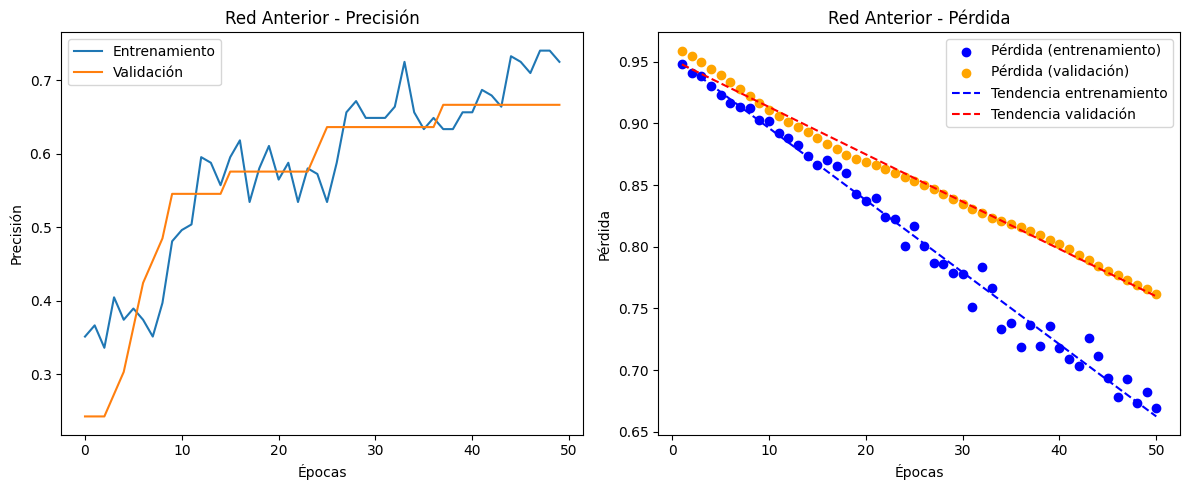

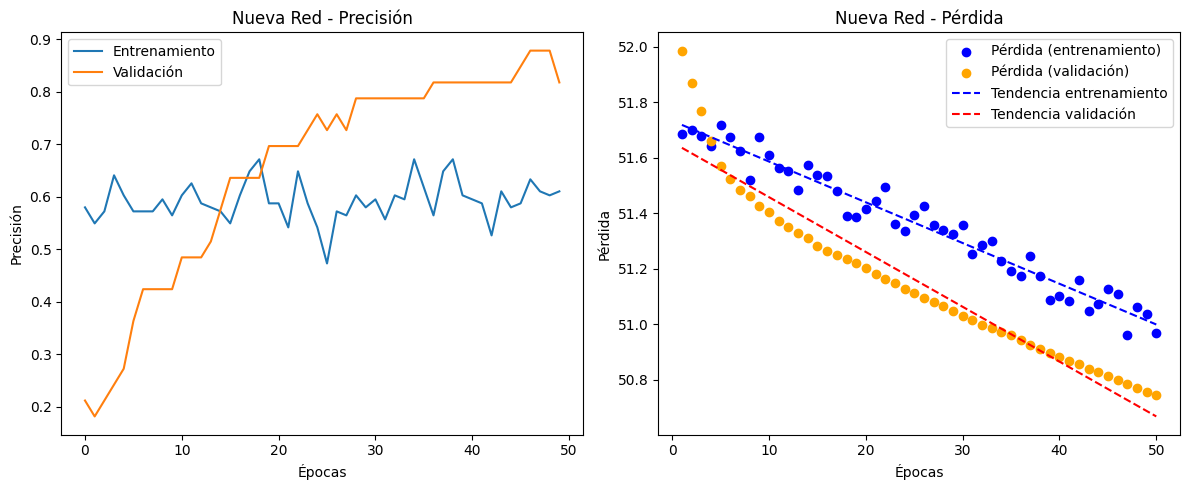

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_historial(history, title):
    # Crear una figura con dos subplots
    plt.figure(figsize=(12, 5))

    # Graficar la precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title(f'{title} - Precisión')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Obtener el historial de la pérdida
    loss_history = history.history['loss']
    val_loss_history = history.history['val_loss']
    epochs = range(1, len(loss_history) + 1)

    # Graficar la pérdida con dispersión y línea de tendencia
    plt.subplot(1, 2, 2)
    plt.scatter(epochs, loss_history, label='Pérdida (entrenamiento)', color='blue')
    plt.scatter(epochs, val_loss_history, label='Pérdida (validación)', color='orange')

    # Línea de tendencia para la pérdida de entrenamiento
    z = np.polyfit(epochs, loss_history, 1)
    p = np.poly1d(z)
    plt.plot(epochs, p(epochs), "b--", label="Tendencia entrenamiento")

    # Línea de tendencia para la pérdida de validación
    z_val = np.polyfit(epochs, val_loss_history, 1)
    p_val = np.poly1d(z_val)
    plt.plot(epochs, p_val(epochs), "r--", label="Tendencia validación")

    plt.title(f'{title} - Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Graficar los historiales de ambos modelos
graficar_historial(history_anterior, 'Red Anterior')
graficar_historial(history_nueva, 'Nueva Red')

Como se puede apreciar en las anteriores gráficas se denota la diferencia entre las dos redes (PEC2 antigua y PEC3 nueva) mediante las gráficas de precisión y pérdida. Se observa que el gráfico de pérdida de la nueva red tiene menos overfitting al tener los puntos más dispersos a comparación de la red anterior para la ejecucion realizada: Eso con respecto a los datos de validación, mientras que la variación del entrenamiento se mantiene. Al igual que a través de las épocas se obtiene una mejor precisión con los datos de validación que con los de entrenamiento, demostrando que la nueva red funciona bien con nuevos datos y no se sobreajusta a aprender datos específicos del entrenamiento, sino que generaliza los patrone sy es capaz de rendir bien con nuevos datos. Este comportamiento se repite globalmente a través de todas las ejecuciones.